In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.cluster.cure import cure
from pyclustering.utils import draw_clusters
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import rand_score, adjusted_mutual_info_score

In [2]:
df = pd.read_csv("ObesityDataSet.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

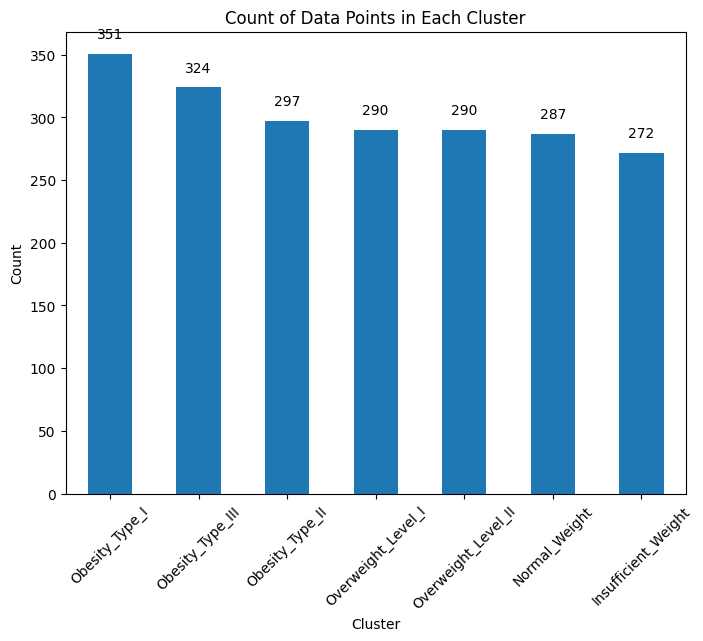

In [5]:
# custom_colors = ['red', 'green', 'blue', 'orange']  # Add more colors if needed

cluster_counts = df['NObeyesdad'].value_counts()

# Creating the bar graph
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar')
plt.title('Count of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
# Annotating counts on top of each bar
for i, count in enumerate(cluster_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

# plt.savefig("condition counts.png")
plt.show()

In [6]:
def classes(ob):
    if (ob == "Obesity_Type_I") or (ob == "Obesity_Type_II") or (ob == "Obesity_Type_III"):
        return 0
    elif (ob == "Overweight_Level_I") or (ob == "Overweight_Level_II"):
        return 1
    elif (ob == "Normal_Weight"):
        return 2
    else:
        return 3
    
df['NObeyesdad'] = df['NObeyesdad'].apply(classes)

In [7]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,2
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,2
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,2
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,1
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,1


In [8]:
df = df[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'NObeyesdad']]
df['Gender'] = df['Gender'].apply(lambda g: 0 if g == "Female" else 1)
df['family_history_with_overweight'] = df['family_history_with_overweight'].apply(lambda g: 0 if g == "no" else 1)

In [9]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,NObeyesdad
0,0,21.0,1.62,64.0,1,2
1,0,21.0,1.52,56.0,1,2
2,1,23.0,1.80,77.0,1,2
3,1,27.0,1.80,87.0,0,1
4,1,22.0,1.78,89.8,0,1


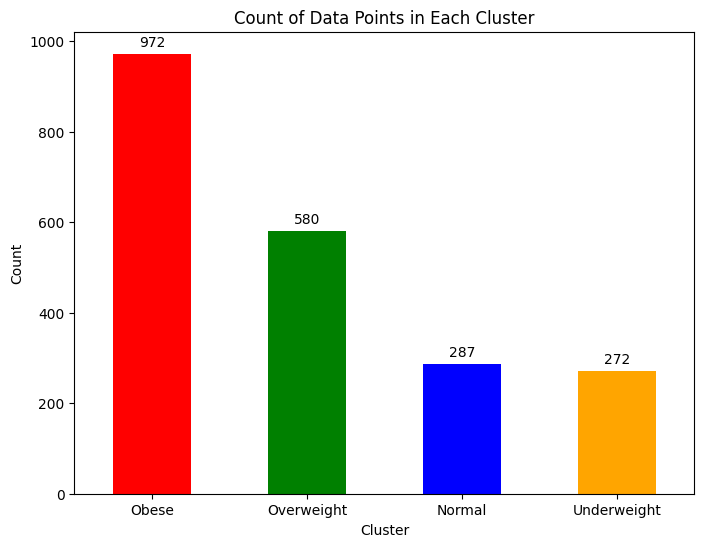

In [10]:
cluster_names = {0: 'Obese', 1: 'Overweight', 2: 'Normal', 3: 'Underweight'}  # Replace with your desired cluster names

# Replace numerical cluster labels with named labels
df['cluster_named'] = df['NObeyesdad'].map(cluster_names)

cluster_counts = df['cluster_named'].value_counts()

custom_colors = ['red', 'green', 'blue', 'orange']  # Add more colors if needed

# Creating the bar graph
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color = custom_colors)
plt.title('Count of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
# Annotating counts on top of each bar
for i, count in enumerate(cluster_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.savefig("condition counts.png")
plt.show()

In [11]:
scale_cols = ['Age', 'Height', 'Weight']
sc = StandardScaler()
df[scale_cols] = sc.fit_transform(df[scale_cols])

## Model selection

In [12]:
df = df.drop(['cluster_named'],axis = 1)

amis,amis2,amis3,amis4,amis5 = [],[],[],[],[]
rands,rands2,rands3,rands4,rands5 = [],[],[],[],[]
silhs,silhs2,silhs3,silhs4,silhs5 = [],[],[],[],[]

only = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'NObeyesdad']

for i in range(5,105,5):
    data = df.drop(['NObeyesdad'], axis = 1)
    data = data.values.tolist()
    cure_instance = cure(data, 4, compression = (i / 100), number_represent_points = 1)
    cure_instance.process()
    clusters = cure_instance.get_clusters()
    # Flatten the list and create a dictionary mapping indices to their respective sublist index
    indices_map = {index: sublist_index for sublist_index, sublist in enumerate(clusters) for index in sublist}
    # Create a new column based on the mapping
    df['cluster'] = df.index.map(indices_map)
    df_only = df[only]
    silhs.append(silhouette_score(df_only,df['cluster']))
    # print(silhs)
    rands.append(rand_score(df['NObeyesdad'],df['cluster']))
    # print(rands)
    amis.append(adjusted_mutual_info_score(df['NObeyesdad'],df['cluster']))
    df = df.drop(['cluster'], axis = 1)
    
for i in range(5,105,5):
    data = df.drop(['NObeyesdad'], axis = 1)
    data = data.values.tolist()
    cure_instance = cure(data, 4, compression = (i / 100), number_represent_points = 2)
    cure_instance.process()
    clusters = cure_instance.get_clusters()
    # Flatten the list and create a dictionary mapping indices to their respective sublist index
    indices_map = {index: sublist_index for sublist_index, sublist in enumerate(clusters) for index in sublist}
    # Create a new column based on the mapping
    df['cluster'] = df.index.map(indices_map)
    df_only = df[only]
    silhs2.append(silhouette_score(df_only,df['cluster']))
    # print(silhs)
    rands2.append(rand_score(df['NObeyesdad'],df['cluster']))
    # print(rands)
    amis2.append(adjusted_mutual_info_score(df['NObeyesdad'],df['cluster']))
    df = df.drop(['cluster'], axis = 1)
    
for i in range(5,105,5):
    data = df.drop(['NObeyesdad'], axis = 1)
    data = data.values.tolist()
    cure_instance = cure(data, 4, compression = (i / 100), number_represent_points = 3)
    cure_instance.process()
    clusters = cure_instance.get_clusters()
    # Flatten the list and create a dictionary mapping indices to their respective sublist index
    indices_map = {index: sublist_index for sublist_index, sublist in enumerate(clusters) for index in sublist}
    # Create a new column based on the mapping
    df['cluster'] = df.index.map(indices_map)
    df_only = df[only]
    silhs3.append(silhouette_score(df_only,df['cluster']))
    # print(silhs)
    rands3.append(rand_score(df['NObeyesdad'],df['cluster']))
    # print(rands)
    amis3.append(adjusted_mutual_info_score(df['NObeyesdad'],df['cluster']))
    df = df.drop(['cluster'], axis = 1)
    
for i in range(5,105,5):
    data = df.drop(['NObeyesdad'], axis = 1)
    data = data.values.tolist()
    cure_instance = cure(data, 4, compression = (i / 100), number_represent_points = 4)
    cure_instance.process()
    clusters = cure_instance.get_clusters()
    # Flatten the list and create a dictionary mapping indices to their respective sublist index
    indices_map = {index: sublist_index for sublist_index, sublist in enumerate(clusters) for index in sublist}
    # Create a new column based on the mapping
    df['cluster'] = df.index.map(indices_map)
    df_only = df[only]
    silhs4.append(silhouette_score(df_only,df['cluster']))
    # print(silhs)
    rands4.append(rand_score(df['NObeyesdad'],df['cluster']))
    # print(rands)
    amis4.append(adjusted_mutual_info_score(df['NObeyesdad'],df['cluster']))
    df = df.drop(['cluster'], axis = 1)
    
for i in range(5,105,5):
    data = df.drop(['NObeyesdad'], axis = 1)
    data = data.values.tolist()
    cure_instance = cure(data, 4, compression = (i / 100), number_represent_points = 5)
    cure_instance.process()
    clusters = cure_instance.get_clusters()
    # Flatten the list and create a dictionary mapping indices to their respective sublist index
    indices_map = {index: sublist_index for sublist_index, sublist in enumerate(clusters) for index in sublist}
    # Create a new column based on the mapping
    df['cluster'] = df.index.map(indices_map)
    df_only = df[only]
    silhs5.append(silhouette_score(df_only,df['cluster']))
    # print(silhs)
    rands5.append(rand_score(df['NObeyesdad'],df['cluster']))
    # print(rands)
    amis5.append(adjusted_mutual_info_score(df['NObeyesdad'],df['cluster']))
    df = df.drop(['cluster'], axis = 1)

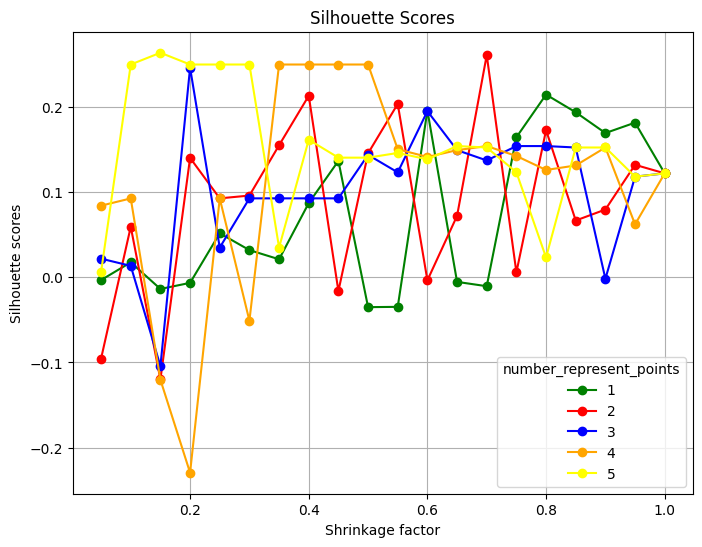

In [13]:
import matplotlib.pyplot as plt

# Given data
x_values = [round(i * 0.05, 2) for i in range(1, int(1 / 0.05) + 1)]
y_values = silhs
y_values2 = silhs2
y_values3 = silhs3
y_values4 = silhs4
y_values5 = silhs5

# Creating the plot
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', color = 'green', label = "1")
plt.plot(x_values, y_values2, marker='o', linestyle='-', color = 'red', label = "2")
plt.plot(x_values, y_values3, marker='o', linestyle='-', color = 'blue', label = "3")
plt.plot(x_values, y_values4, marker='o', linestyle='-', color = 'orange', label = "4")
plt.plot(x_values, y_values5, marker='o', linestyle='-', color = 'yellow', label = "5")
plt.xlabel('Shrinkage factor')
plt.ylabel('Silhouette scores')
plt.title('Silhouette Scores')
plt.grid(True)
plt.legend(title = "number_represent_points")
plt.savefig("silhouette.png")
plt.show()


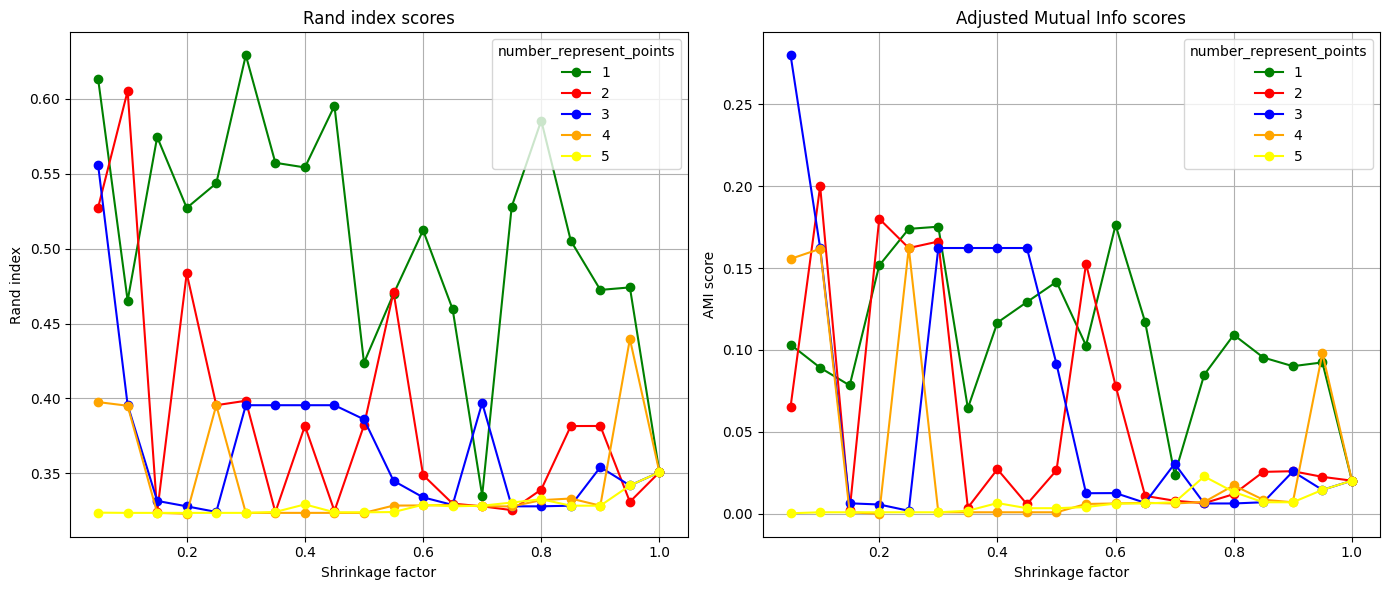

In [14]:
import matplotlib.pyplot as plt

# Given data for Rand index scores
x_values = [round(i * 0.05, 2) for i in range(1, int(1 / 0.05) + 1)]
y_values = rands
y_values2 = rands2
y_values3 = rands3
y_values4 = rands4
y_values5 = rands5

# Creating the plot for Rand index scores
plt.figure(figsize=(14, 6))  # Adjust the figure size as needed

plt.subplot(1, 2, 1)  # Creating the first subplot
plt.plot(x_values, y_values, marker='o', linestyle='-', color='green', label="1")
plt.plot(x_values, y_values2, marker='o', linestyle='-', color='red', label="2")
plt.plot(x_values, y_values3, marker='o', linestyle='-', color='blue', label="3")
plt.plot(x_values, y_values4, marker='o', linestyle='-', color='orange', label="4")
plt.plot(x_values, y_values5, marker='o', linestyle='-', color='yellow', label="5")
plt.xlabel('Shrinkage factor')
plt.ylabel('Rand index')
plt.title('Rand index scores')
plt.grid(True)
plt.legend(title="number_represent_points")

# Given data for Adjusted Mutual Info scores
y_values = amis
y_values2 = amis2
y_values3 = amis3
y_values4 = amis4
y_values5 = amis5

# Creating the plot for Adjusted Mutual Info scores
plt.subplot(1, 2, 2)  # Creating the second subplot
plt.plot(x_values, y_values, marker='o', linestyle='-', color='green', label="1")
plt.plot(x_values, y_values2, marker='o', linestyle='-', color='red', label="2")
plt.plot(x_values, y_values3, marker='o', linestyle='-', color='blue', label="3")
plt.plot(x_values, y_values4, marker='o', linestyle='-', color='orange', label="4")
plt.plot(x_values, y_values5, marker='o', linestyle='-', color='yellow', label="5")
plt.xlabel('Shrinkage factor')
plt.ylabel('AMI score')
plt.title('Adjusted Mutual Info scores')
plt.grid(True)
plt.legend(title="number_represent_points")

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("combined_plots.png")
plt.show()

### Cluster counts

In [15]:
data = df.drop(['NObeyesdad'], axis = 1)
data = data.values.tolist()
cure_instance = cure(data, 4, compression = 0.3, number_represent_points = 1)
# cure_instance = cure(data, 4)
cure_instance.process()
clusters = cure_instance.get_clusters()

# Flatten the list and create a dictionary mapping indices to their respective sublist index
indices_map = {index: sublist_index for sublist_index, sublist in enumerate(clusters) for index in sublist}

# Create a new column based on the mapping
df['cluster'] = df.index.map(indices_map)

df['cluster'].value_counts()

0    983
2    643
3    466
1     19
Name: cluster, dtype: int64

## Evaluation

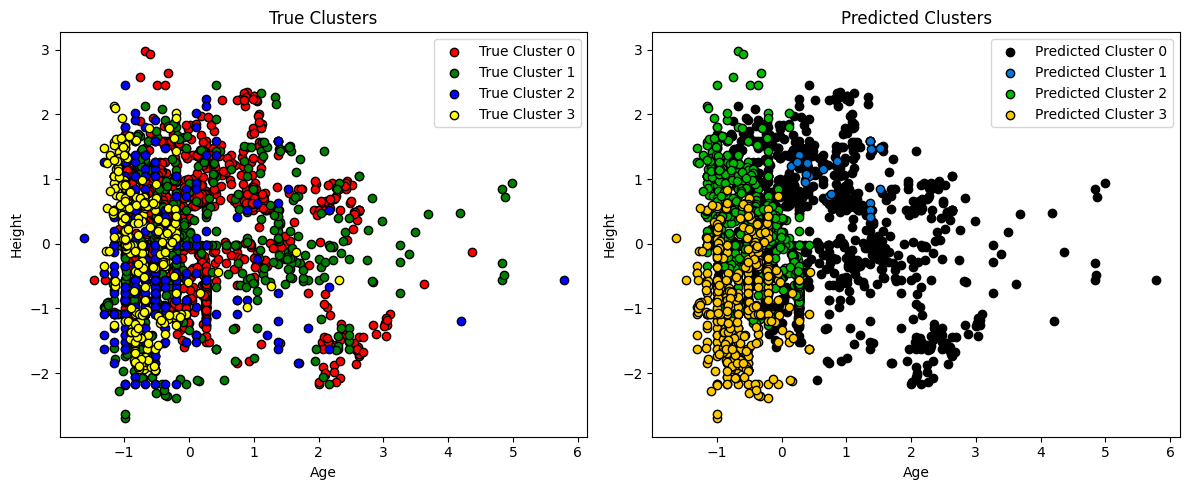

In [16]:
# Extracting features and labels
features = df[['Age', 'Height']]  # You can select any two features for visualization
true_clusters = df['NObeyesdad']
predicted_clusters = df['cluster']

# Assigning unique colors for true clusters
true_colors = ['red', 'green', 'blue', 'yellow']  # You can modify colors as needed

# Creating a color map for predicted clusters
label_encoder = LabelEncoder()
label_encoder.fit(predicted_clusters)
predicted_colors = [plt.cm.nipy_spectral(i / len(label_encoder.classes_)) for i in range(len(label_encoder.classes_))]

# Plotting true clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for cluster_id in range(len(label_encoder.classes_)):
    plt.scatter(features[true_clusters == cluster_id]['Age'], features[true_clusters == cluster_id]['Height'], color=true_colors[cluster_id], edgecolor='k', label=f'True Cluster {cluster_id}')
plt.title('True Clusters')
plt.xlabel('Age')
plt.ylabel('Height')
plt.legend()

# Plotting predicted clusters
plt.subplot(1, 2, 2)
for cluster_id in range(len(label_encoder.classes_)):
    plt.scatter(features[predicted_clusters == cluster_id]['Age'], features[predicted_clusters == cluster_id]['Height'], color=predicted_colors[cluster_id], edgecolor='k', label=f'Predicted Cluster {cluster_id}')
plt.title('Predicted Clusters')
plt.xlabel('Age')
plt.ylabel('Height')
plt.legend()

plt.tight_layout()
plt.show()
